<a href="https://colab.research.google.com/github/AlineEmmer/MachineLearning/blob/main/gbc_Dyslipidemia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This project analyzed a database containing infrared spectra of patients: group 0 = patients with dyslipidemia (n=100), group 1 = individuals with hypertriglyceridemia (n=100), group 2 = patients with hypercholesterolemia (n=100), and group 3 = healthy patients (n=100). The variables were selected according the VIP score - PLS-DA (Matlab) (n=188). The aim is to develop a machine learning model for predicting dyslipidemia and identifying wavelengths in the spectrum associated with these diseases, with a view to optimizing diagnosis


In [ ]:
# Task to be performed
# Step 1: Import the database
# Step 2: Import the Pandas library to help manipulate the database
# Step 3: Installing the Pycaret library (helps to perform Auto-Machine Learn)
# Step 4: Importing the Pycaret library
# Step 5: Pre-processing the data
# Step 6: Building and comparing different models
# Step 7: Training the best model based on predictive performance metrics
# Step 8: Extracting the results of the model's metrics
# Step 9: Ploting the 10 most important wavenumbers
# Step 10: Conclusions about the model
# Step 11: Saving the model to make predictions in real life (Deploy)

# # Step 1: Import the database


In [ ]:
# Step 1: Import the database

from google.colab import files
uploaded = files.upload()

Saving VIPs_PLS-DA.xlsx to VIPs_PLS-DA.xlsx


# # Step 2: Import the Pandas library to help manipulate the database


In [ ]:
# Step 2: Import the Pandas library to help manipulate the database
import pandas as pd
df1 = pd.read_excel("VIPs_PLS-DA.xlsx")
display (df1)

,Classes,3000,2999.5,2998.1,2996.7,2995.3,2993.9,2992.4,2991,2989.6,...,1503.3,1501.9,1500.5,1499.1,1497.6,1405.5,1404.1,1402.7,1401.3,1400
0,HC,0.8724,0.8733,0.8742,0.8754,0.8767,0.8780,0.8791,0.8803,0.8816,...,0.8865,0.8869,0.8871,0.8872,0.8875,0.8931,0.8926,0.8921,0.8915,0.8908
1,HC,0.8730,0.8739,0.8749,0.8760,0.8771,0.8783,0.8795,0.8808,0.8823,...,0.8887,0.8891,0.8893,0.8895,0.8899,0.8963,0.8958,0.8953,0.8947,0.8940
2,HC,0.8725,0.8736,0.8747,0.8760,0.8773,0.8785,0.8795,0.8807,0.8819,...,0.8889,0.8894,0.8896,0.8898,0.8900,0.8961,0.8959,0.8956,0.8950,0.8942
3,HC,0.8728,0.8737,0.8747,0.8758,0.8772,0.8786,0.8800,0.8813,0.8826,...,0.8895,0.8897,0.8898,0.8898,0.8900,0.8965,0.8961,0.8954,0.8946,0.8936
4,HC,0.8729,0.8738,0.8746,0.8757,0.8770,0.8783,0.8797,0.8810,0.8823,...,0.8888,0.8891,0.8892,0.8893,0.8896,0.8960,0.8955,0.8949,0.8943,0.8936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,DYS,0.8794,0.8808,0.8821,0.8835,0.8848,0.8861,0.8874,0.8888,0.8903,...,0.8912,0.8914,0.8915,0.8916,0.8920,0.8981,0.8978,0.8975,0.8972,0.8969
396,DYS,0.8796,0.8808,0.8820,0.8835,0.8851,0.8865,0.8878,0.8891,0.8904,...,0.8904,0.8908,0.8912,0.8915,0.8919,0.8978,0.8973,0.8969,0.8965,0.8960
397,DYS,0.8797,0.8809,0.8821,0.8836,0.8849,0.8861,0.8873,0.8886,0.8901,...,0.8903,0.8907,0.8910,0.8913,0.8918,0.8972,0.8968,0.8963,0.8959,0.8956
398,DYS,0.8799,0.8812,0.8825,0.8839,0.8852,0.8864,0.8876,0.8889,0.8904,...,0.8903,0.8908,0.8911,0.8915,0.8918,0.8969,0.8965,0.8962,0.8959,0.8955


# # Step 3: Installing the Pycaret library (helps to perform Auto-Machine Learn)


In [ ]:
# Step 3: Installing the Pycaret library (helps to perform Auto-Machine Learn)
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.8 MB/s

# # Step 4: Importing the Pycaret library


In [ ]:
# Step 4: Importing the Pycaret library
from pycaret import classification

# # Step 5: Pre-processing the data


In [ ]:
# Step 5: Pre-processing the data
classification_setup = classification.setup(data = df1, target = "Classes")

,Description,Value
0,Session id,8047
1,Target,Classes
2,Target type,Multiclass
3,Target mapping,"DYS: 0, HC: 1, HEALTHY: 2, HT: 3"
4,Original data shape,"(400, 189)"
5,Transformed data shape,"(400, 189)"
6,Transformed train set shape,"(280, 189)"
7,Transformed test set shape,"(120, 189)"
8,Numeric features,188
9,Preprocess,True


# # Step 6: Building and comparing different models


In [ ]:
# Step 6: Building and comparing different models
best = classification.compare_models(exclude=['lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9929,0.9994,0.9929,0.9938,0.9928,0.9905,0.9908,0.0710
rf,Random Forest Classifier,0.9893,1.0000,0.9893,0.9913,0.9891,0.9857,0.9865,0.1000
xgboost,Extreme Gradient Boosting,0.9857,0.9974,0.9857,0.9882,0.9855,0.9810,0.9819,0.1300
knn,K Neighbors Classifier,0.9750,0.9980,0.9750,0.9763,0.9749,0.9667,0.9672,0.0230
gbc,Gradient Boosting Classifier,0.9750,0.9995,0.9750,0.9788,0.9748,0.9667,0.9681,0.8720
dt,Decision Tree Classifier,0.9714,0.9810,0.9714,0.9784,0.9701,0.9619,0.9649,0.0210
lda,Linear Discriminant Analysis,0.9500,0.9901,0.9500,0.9527,0.9496,0.9333,0.9345,0.0200
nb,Naive Bayes,0.9357,0.9906,0.9357,0.9473,0.9339,0.9143,0.9191,0.0180
ridge,Ridge Classifier,0.8321,0.0000,0.8321,0.8643,0.7994,0.7762,0.8046,0.0180
lr,Logistic Regression,0.8250,0.9362,0.8250,0.8475,0.7945,0.7667,0.7935,0.5290


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

# # Step 7: Training the best model based on predictive performance metrics

In [ ]:
# Step 7: Training the best model based on predictive performance metrics
# Note: The gbc model was one of the three best. Now, we'll create and validate the gradient trees Classifier model
best_model = classification.create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9643,1.0000,0.9643,0.9688,0.9641,0.9524,0.9540
4,0.9643,1.0000,0.9643,0.9688,0.9641,0.9524,0.9540
5,0.9286,0.9949,0.9286,0.9444,0.9271,0.9048,0.9110
6,0.9643,1.0000,0.9643,0.9688,0.9641,0.9524,0.9540
7,0.9643,1.0000,0.9643,0.9688,0.9641,0.9524,0.9540
8,0.9643,1.0000,0.9643,0.9688,0.9641,0.9524,0.9540


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# # Step 8: Extracting the results of the model's metrics


In [ ]:
# Step 8: Extracting the results of the model's metrics
# General evaluation
classification.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

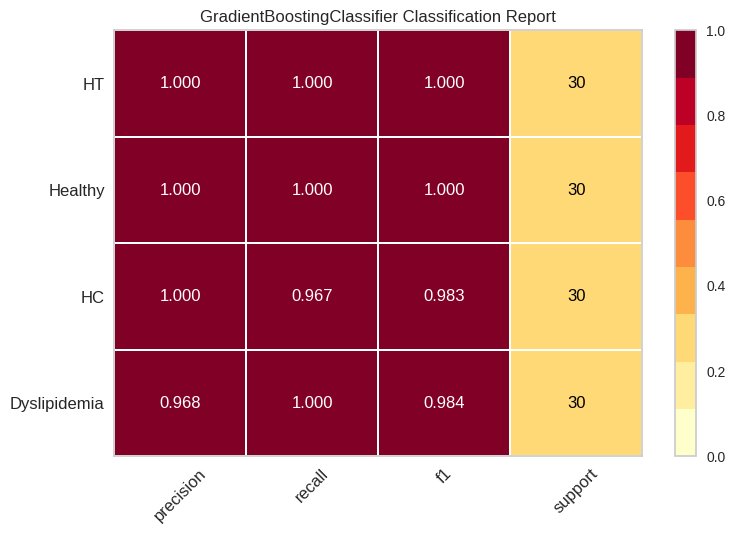

'Class Report.png'

In [ ]:
# Saving the figures of merit of the model
# Ploting Class report
#DYS: 0, HC: 1, HT: 2, Healthy: 3
classification.plot_model(best_model, plot ="class_report", plot_kwargs ={'classes': ["Dyslipidemia", "HC","Healthy", "HT"]})
classification.plot_model(best_model, plot ="class_report", plot_kwargs ={'classes': ["Dyslipidemia", "HC","Healthy", "HT"]}, save=True, scale=5)


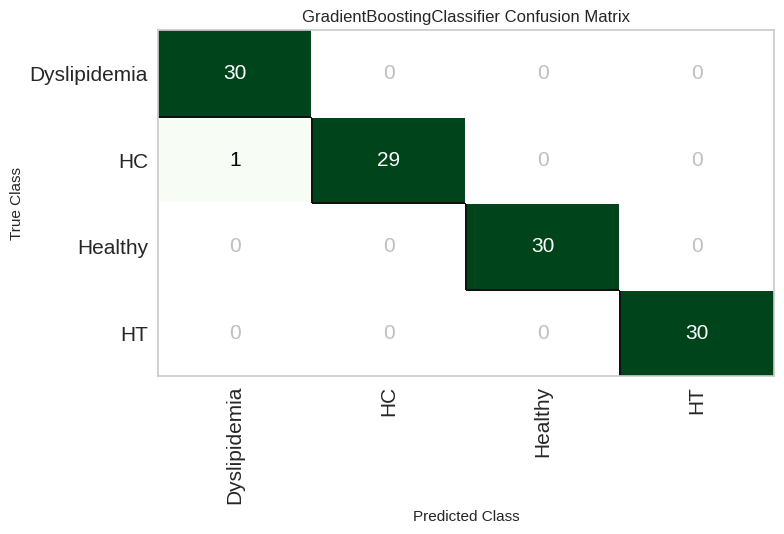

'Confusion Matrix.png'

In [ ]:
# Plotando a matriz de confusão
classification.plot_model(best_model, plot ="confusion_matrix", plot_kwargs ={'classes': ["Dyslipidemia", "HC","Healthy", "HT"]})
classification.plot_model(best_model, plot ="confusion_matrix", plot_kwargs ={'classes':  ["Dyslipidemia", "HC","Healthy", "HT"]}, save=True)

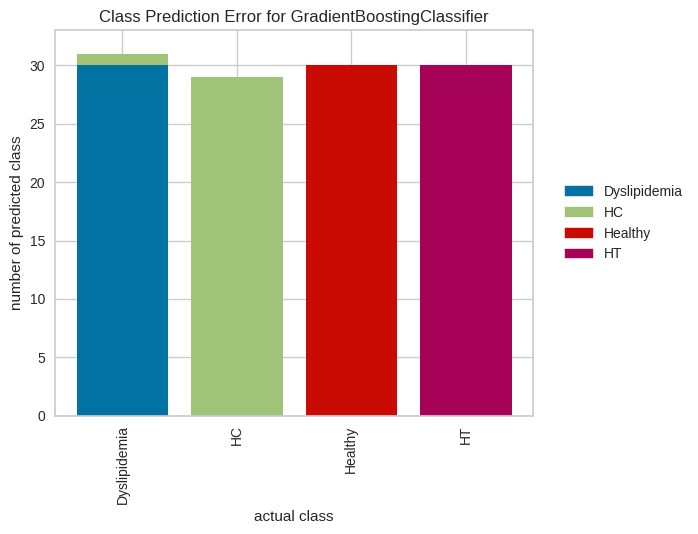

'Prediction Error.png'

In [ ]:
# Plotando prediction error
classification.plot_model(best_model, plot ="error",  plot_kwargs ={'classes': ["Dyslipidemia", "HC","Healthy", "HT"]})
classification.plot_model(best_model, plot ="error",  plot_kwargs ={'classes':  ["Dyslipidemia", "HC","Healthy", "HT"]}, save=True)

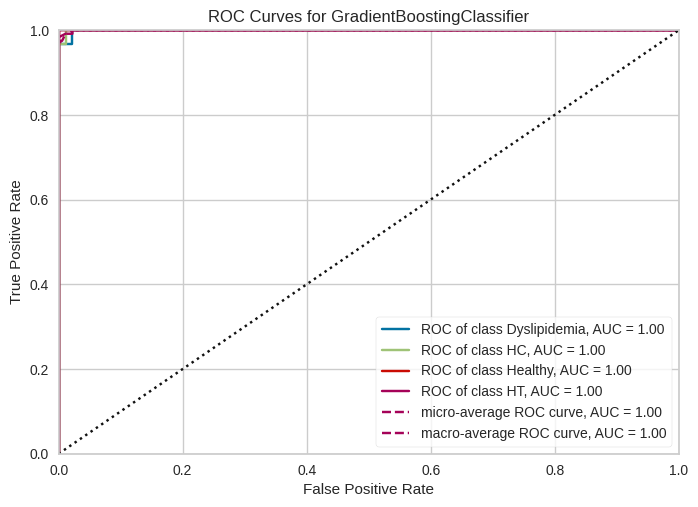

'AUC.png'

In [ ]:
# Plotando AUC
classification.plot_model(best_model, plot ="auc", plot_kwargs ={'classes':  ["Dyslipidemia", "HC","Healthy", "HT"]})
classification.plot_model(best_model, plot ="auc", plot_kwargs ={'classes':  ["Dyslipidemia", "HC","Healthy", "HT"]}, save=True)

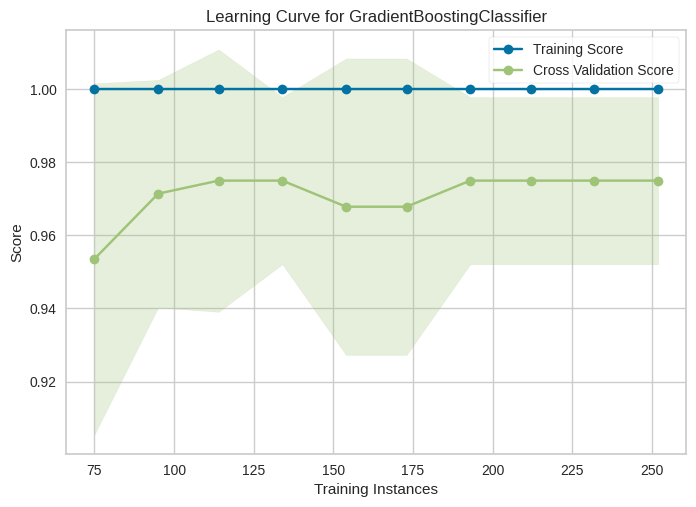

'Learning Curve.png'

In [ ]:
# Plotando decision boundary
classification.plot_model(best_model, plot ="learning")
classification.plot_model(best_model, plot ="learning", save=True)

# # Step 9: Ploting the 10 most important wavenumbers


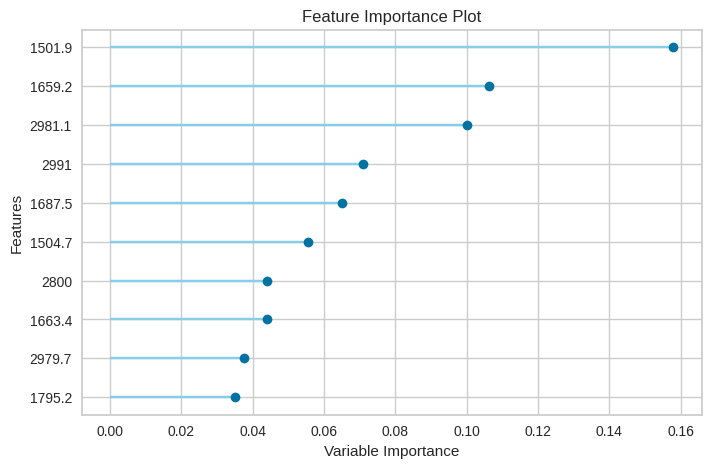

'Feature Importance.png'

In [ ]:
# Step 9: Ploting the 10 most important wavenumbers
classification.plot_model(best_model, plot ="feature")
classification.plot_model(best_model, plot ="feature", save=True)

# # Step 10: Conclusions about the model


In [ ]:
# Step 10: Conclusions about the model
# Several machine learning models have been built for predicting the diagnosis of dyslipidemia using infrared spectrum data from individuals' serum samples
# GBC's model was one of those that showed the best predictive performance
# The top 5 most important wavelengths for diagnosing dyslipidemia were:2978,2982,1658,1712,1402,2853
# The next step is to develop the App so that the model can be used in health units to optimize the start of pharmacological treatment in patients with dyslipidemia

# # # Step 11: Saving the model to make predictions in real life (Deploy)



In [ ]:
# Passo 11: Salvando o modelo para realizar predições na vida real (Deploy)
classification.save_model(best_model, "melhor_modelo_gbc")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['3000', '2999.5', '2998.1',
                                              '2996.7', '2995.3', '2993.9',
                                              '2992.4', '2991', '2989.6',
                                              '2988.2', '2986.8', '2985.4',
                                              '2983.9', '2982.5', '2981.1',
                                              '2979.7',...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_depth=3, max_features=None,
     